# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    * одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    * SVM;
    * дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

В качестве набора данных используется dataset рейтингов университетов мира на основании трёх рейтингов. Датасет доступен по адресу: https://www.kaggle.com/mylesoneill/world-university-rankings

Из набора данных будет рассматриваться только файл cwurData.csv

## Основные характеристики набора данных

Подключаем все необходимые библиотеки

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")
from io import StringIO

Подключаем Dataset

In [44]:
data = pd.read_csv('cwurData.csv', sep=",")

Размер набора данных

In [45]:
data.shape

(2200, 14)

Типы колонок

In [46]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

Проверяем, есть ли пропущенные значения

In [47]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Первые 5 строк датасета

In [48]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [49]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


Процент пропусков в // broad_impact

In [50]:
(200 / 2200) * 100

9.090909090909092

Настройка отображения графиков

In [51]:
# Задание формата графиков для сохранения высокого качества PNG
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# Задание ширины графиков, чтобы они помещались на A4
pd.set_option("display.width", 70)

## Обработка пропусков данных

### Очистка строк

Можно очистить строки, содержащие пропуски. При этом останутся данные только за 2014 и 2015 гг (см. описание датасета)

In [52]:
# Удаление строк, содержащих пустые значения
data_no_null = data.dropna(axis=0, how='any')
(data.shape, data_no_null.shape)

((2200, 14), (2000, 14))

Выведем первые 11 строк, чтобы убедиться, что данные в `national_rank` числовые (Jupyter Lab в предпросмотре CSV показывает не совсем верно)

In [53]:
data_no_null.head(11)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
205,6,Columbia University,USA,4,13,8,9,14,13,9,13.0,4,97.41,2014
206,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7.0,28,92.84,2014
207,8,University of Chicago,USA,6,10,14,8,17,19,10,18.0,149,92.03,2014
208,9,Princeton University,USA,7,5,16,3,70,25,19,41.0,204,88.56,2014
209,10,Yale University,USA,8,9,25,11,18,7,32,19.0,45,88.11,2014


In [54]:
total_count = data_no_null.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2000


## Кодирование категориальных признаков

Преобразуем названия стран, городов, и тд в числовые зеачения (label encoding)

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [56]:
le = LabelEncoder()
    # "institution"
le.fit(data_no_null.institution.drop_duplicates()) 
data_no_null.institution = le.transform(data_no_null.institution)
    # "country"
le.fit(data_no_null["country"].drop_duplicates()) 
data_no_null["country"] = le.transform(data_no_null["country"])

C:\Users\fgv9\AppData\Local\Temp\ipykernel_25568\3685851712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null.institution = le.transform(data_no_null.institution)
C:\Users\fgv9\AppData\Local\Temp\ipykernel_25568\3685851712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null["country"] = le.transform(data_no_null["country"])


Построим кореляционную матрицу

<AxesSubplot:>

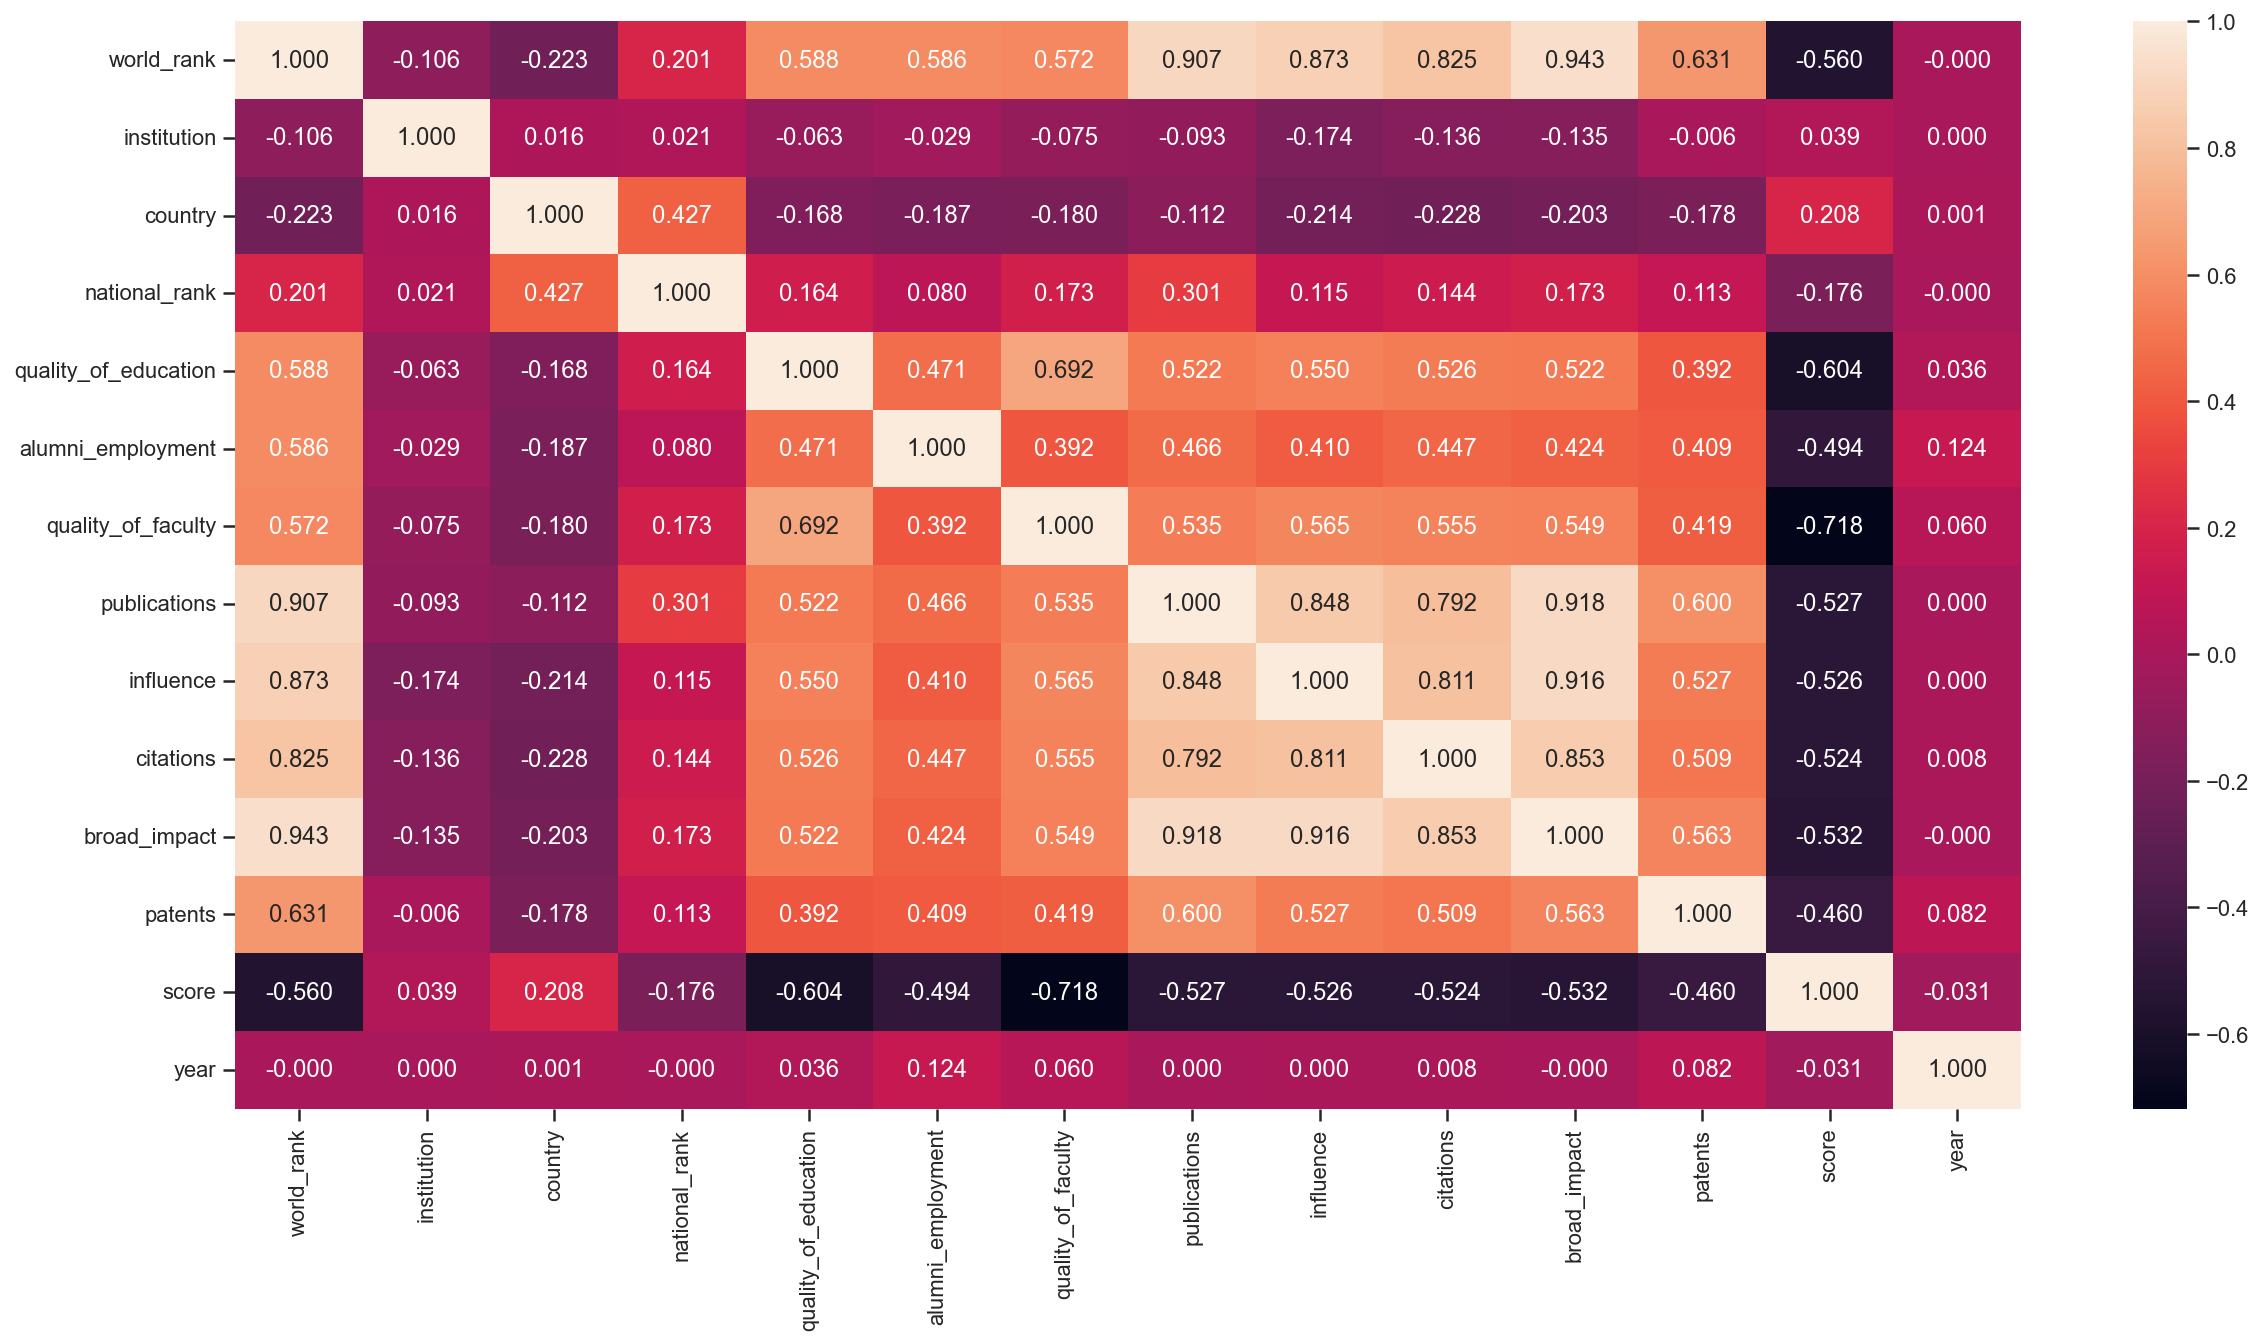

In [57]:
ig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_no_null.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

## Предсказание целевого признака

Предскажем значение целевого признака world_rank по broad_impact и publications, поскольку их значения кореляции ближе всего к 1

### Разбиение выборки на обучающую и тестовую

In [58]:
X = data_no_null[["broad_impact", "publications"]]
Y = data_no_null["world_rank"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      broad_impact  publications
200           1.0             1
201           4.0             5
202           2.0            15
203          13.0            10
204          12.0            11 

Выходные данные:

 200    1
201    2
202    3
203    4
204    5
Name: world_rank, dtype: int64


Разделим выборку на обучающую и тестовую

In [59]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2022, test_size = 0.1)

Входные параметры обучающей выборки

In [60]:
X_train.head()

,broad_impact,publications
2164,932.0,875
1710,590.0,576
428,164.0,200
1389,164.0,233
2089,932.0,675


Входные параметры тестовой выборки

In [61]:
X_test.head()

,broad_impact,publications
1218,14.0,3
1495,265.0,236
843,703.0,943
2042,850.0,803
1869,606.0,701


Выходные параметры обучающей выборки

In [62]:
Y_train.head()

2164    965
1710    511
428     229
1389    190
2089    890
Name: world_rank, dtype: int64

Выходные параметры тестовой выборки

In [63]:
Y_test.head()

1218     19
1495    296
843     644
2042    843
1869    670
Name: world_rank, dtype: int64

### Построение линейной регрессии

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [65]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)
lr_y_pred = Lin_Reg.predict(X_test)

Возьмем тот параметр, чья корреляция ближе всего к единице, т.е. broad_impact

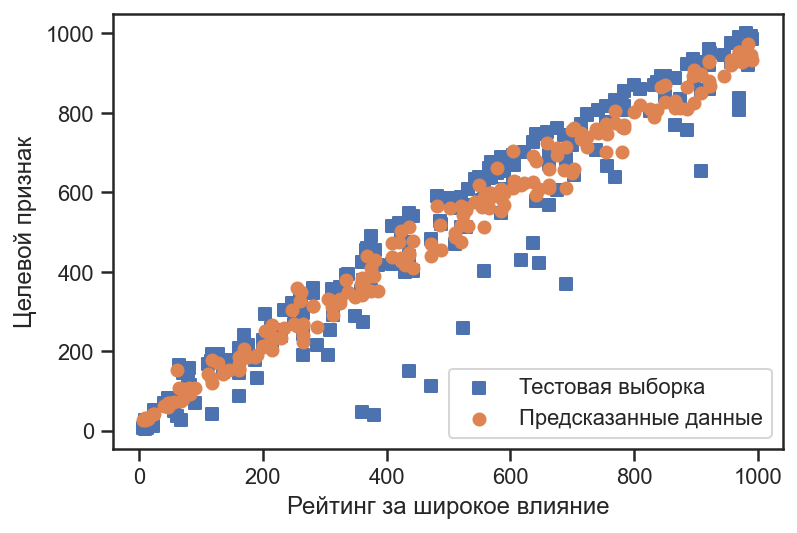

In [66]:
plt.scatter(X_test["broad_impact"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score

In [68]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 54.70203008487859
Средняя квадратичная ошибка: 6228.270901286782
Median absolute error: 42.05433711920932
Коэффициент детерминации: 0.9234584275958889


### SVM

In [69]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets import make_blobs

In [70]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [71]:
pred_y = svc.predict(X_test)

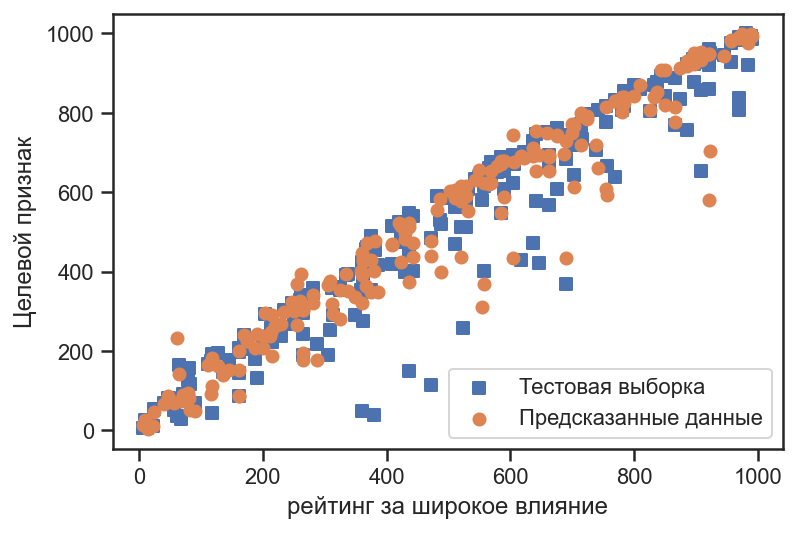

In [72]:
plt.scatter(X_test["broad_impact"], Y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

In [73]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, pred_y))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, pred_y))
print('Median absolute error:',       median_absolute_error(Y_test, pred_y))
print('Коэффициент детерминации:',    r2_score(Y_test, pred_y))

Средняя абсолютная ошибка: 57.19
Средняя квадратичная ошибка: 9379.4
Median absolute error: 27.0
Коэффициент детерминации: 0.8847330124868531


### Дерево (Tree)

In [74]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re
from IPython.core.display import HTML
from sklearn.tree import export_text
import graphviz
from IPython.display import Image
import pydotplus

Обучим дерево на всех признаках

In [75]:
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_test, Y_test)

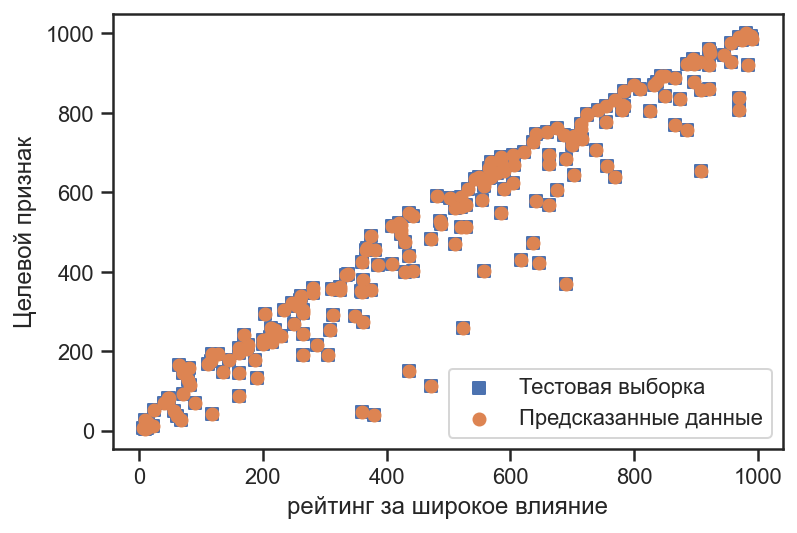

In [76]:
pred_y = reg.predict(X_test)
plt.scatter(X_test["broad_impact"], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test["broad_impact"], pred_y, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('рейтинг за широкое влияние')
plt.ylabel ('Целевой признак')
plt.show()

#### Дерево в текстовом виде

In [77]:
tree_rules = export_text(reg, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

#### Визуализация дерева

In [80]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [81]:
Image(get_png_tree(reg, X.columns), height='100%')

InvocationException: GraphViz's executables not found

#### Важность признаков в дереве

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [ ]:
boston_tree_regr_fl, boston_tree_regr_fd = draw_feature_importances(reg, X)